### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [2]:
data=pd.read_csv('wine.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [6]:
data.shape

(178, 13)

In [7]:
data.columns.unique

<bound method Index.unique of Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')>

In [8]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
# Plotting box plots for finding outliers

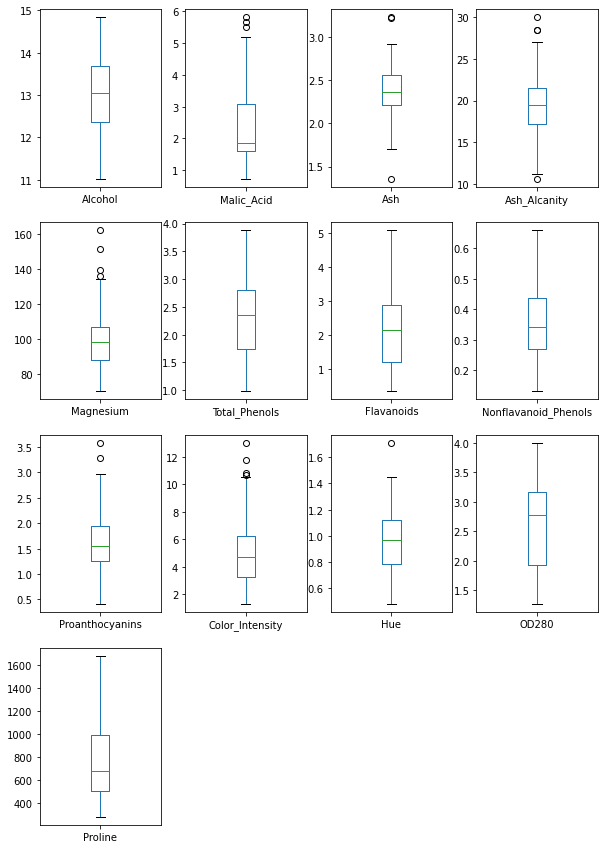

In [10]:
data.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,15))
plt.show()

In [11]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['Malic_Acid', 'Ash','Ash_Alcanity','Magnesium','Proanthocyanins','Color_Intensity','Hue']:
    index_list.extend(outliers(data,feature))
index_list

#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

data=remove(data,index_list)

## K-Means clustering

In [12]:
from sklearn.cluster import KMeans

C:\Users\sreer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


16809594.591732103
4176504.946547173
2214326.7015512018
1241762.6708674044
834147.3191812695
567534.0482759142
359929.88936550275
293488.4582857742
240330.99276469837
191254.76731722345
159367.71848664925
132777.91537665945
116720.69004488167
102795.40193230247


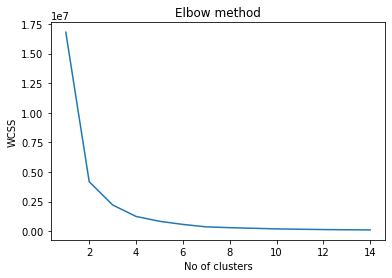

In [13]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,15),wcss) 
plt.title("Elbow method")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

### Using Elbow method we got k=3 that is number of clusters is 3

In [58]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)
print(y_kmeans)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 2 2 2 2 0 1 2 0 1 1 1
 1 1 0 2 2 2 1 2 2 0 0 2 2 2 1 1 1 2 2 1 2 2 1 1 2 1 2 2 1 2 1 2 1 1 2 1 1
 2 2 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 1 1 1 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [59]:
from sklearn.metrics import silhouette_score

In [60]:
s_score=silhouette_score(data,y_kmeans)
print("Before scaling and normalizing",s_score)

Before scaling and normalizing 0.5342876595162483


In [17]:
from sklearn.preprocessing import StandardScaler

In [36]:
scale=StandardScaler()
kmeans=KMeans(n_clusters=3)
from sklearn.pipeline import make_pipeline 
pipeline=make_pipeline(scale,kmeans)
pipeline.fit(data)
label=pipeline.predict(data)



In [37]:
label

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0,
       2, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [61]:
s_score=silhouette_score(data,label)
print("After scaling",s_score)


After scaling 0.41604406291386853


### Normalization

In [21]:
from sklearn.preprocessing import Normalizer

In [39]:
norml=Normalizer()
pipel=make_pipeline(norml,kmeans)
pipel.fit(data)
y_lbl=pipel.predict(data)
y_lbl

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [54]:
s_score=silhouette_score(data,y_lbl)
print("After scaling and normalizing",s_score)


After scaling and normalizing 0.5342876595162483


#### After normalization the silhouette score is 0.534  which is near to one indicating that clustring is better 

## Agglomerative Hierarchical Clustering

In [43]:
#Normalizing
norm=Normalizer()
data=norm.fit_transform(data)

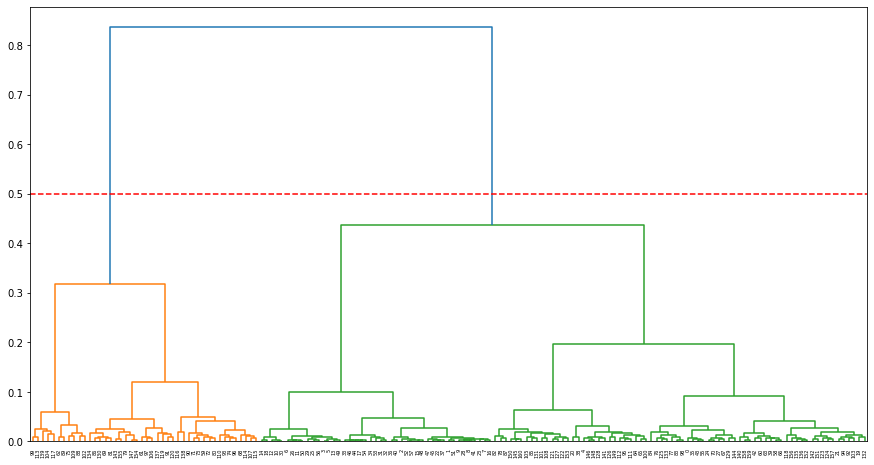

In [44]:
from scipy.cluster.hierarchy import dendrogram,linkage
link=linkage(data,method='ward')
plt.figure(figsize=(15,8))
dendrogram(link,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(0.5,0,5000,colors='r',linestyles='dashed')
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
s_score=silhouette_score(data,y_hc)
print(s_score)


0.5578017044752076


### Agglomerative Clustering:-
#### Here the number of clusters as per the dendrogram is 2
#### Silhouette score ls better compared to K-Means clustering and it is close to 1 indicating clustering is better